# Correlation Testing

In [1]:
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix
import numpy as np
import matplotlib.pylab as plt
import glob
import numpy
import pandas as pd
from nilearn.connectome import ConnectivityMeasure

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)
        
    #fig.savefig("test_1.png")

In [2]:
files=glob.glob('/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-*')
#files=glob.glob('/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/timeseries/rl/subs/sub-*')
reward_subjects = []
punish_subjects = []
pooled_subjects = []

for f in sorted(files):
    print(f)
    array=numpy.loadtxt(f)
    #print(array)
    pooled_subjects.append(array)
    if "punish" in f.split("/")[-1]:
        punish_subjects.append(array)
    else:
        reward_subjects.append(array)
#print("Reward: {} \nPunish: {} \nPooled: {} \n".format(reward_subjects, punish_subjects, pooled_subjects))

/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-001_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-001_reward.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-002_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-002_reward.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-003_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-003_reward.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-004_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-004_reward.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-005_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-005_reward.txt
/Users/jennygilbert/Documents/betaseries

/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-048_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-048_reward.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-050_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-050_reward.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-052_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-052_reward.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-053_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-053_reward.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-054_punish.txt
/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/together/sub-054_reward.txt
/Users/jennygilbert/Documents/betaseries

In [3]:
punish_subjects

[array([[ -64.26211548,    8.2925272 ,  -59.022892  , ...,   51.85830688,
           70.73967743,   36.72953415],
        [ 126.927742  , -197.1023407 ,  -89.32763672, ..., -117.5782242 ,
          -98.78678131,  -65.28662872],
        [  69.77071381, -358.1324768 ,  -71.82532501, ...,  -78.27799988,
           24.27388954,    8.07300282],
        ...,
        [ -27.54195404,  108.8288193 ,  -61.52399445, ...,  -44.75080872,
         -111.9068909 ,  -45.00190353],
        [   5.33482647, -252.4700928 , -144.5738068 , ...,  -30.91782951,
           94.60984039,   23.1912384 ],
        [ 157.5435028 ,   82.24145508,  103.9173203 , ...,   60.43172455,
          157.4132385 ,  119.4465637 ]]),
 array([[  17.52924156,  240.5813904 ,  110.765358  , ...,   33.93557739,
          123.1771774 ,  121.8635483 ],
        [  80.74423981,  -93.71622467,  -65.92166901, ...,  -22.09885406,
          -45.7443161 ,  -62.43334579],
        [ -72.74255371,  -58.71380997,  -61.87715149, ...,  -78.93348694,

In [5]:
roi_datafile = "/Users/jennygilbert/Documents/betaseries_bevel/3_pull_timeseries/betaseries_rois.txt"
#roi_datafile = "/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/betaseries_rois.txt"
roi_df = pd.read_csv(roi_datafile, sep="\t")
#print(roi_df.head())
roi_df.set_index("Region", inplace=True)
roi_coords = [tuple(x) for x in roi_df.to_records(index=False)]

### Reward Condition

Correlations of subjects are stacked in an array of shape (85, 28, 28)
Mean correlation has shape (28, 28).


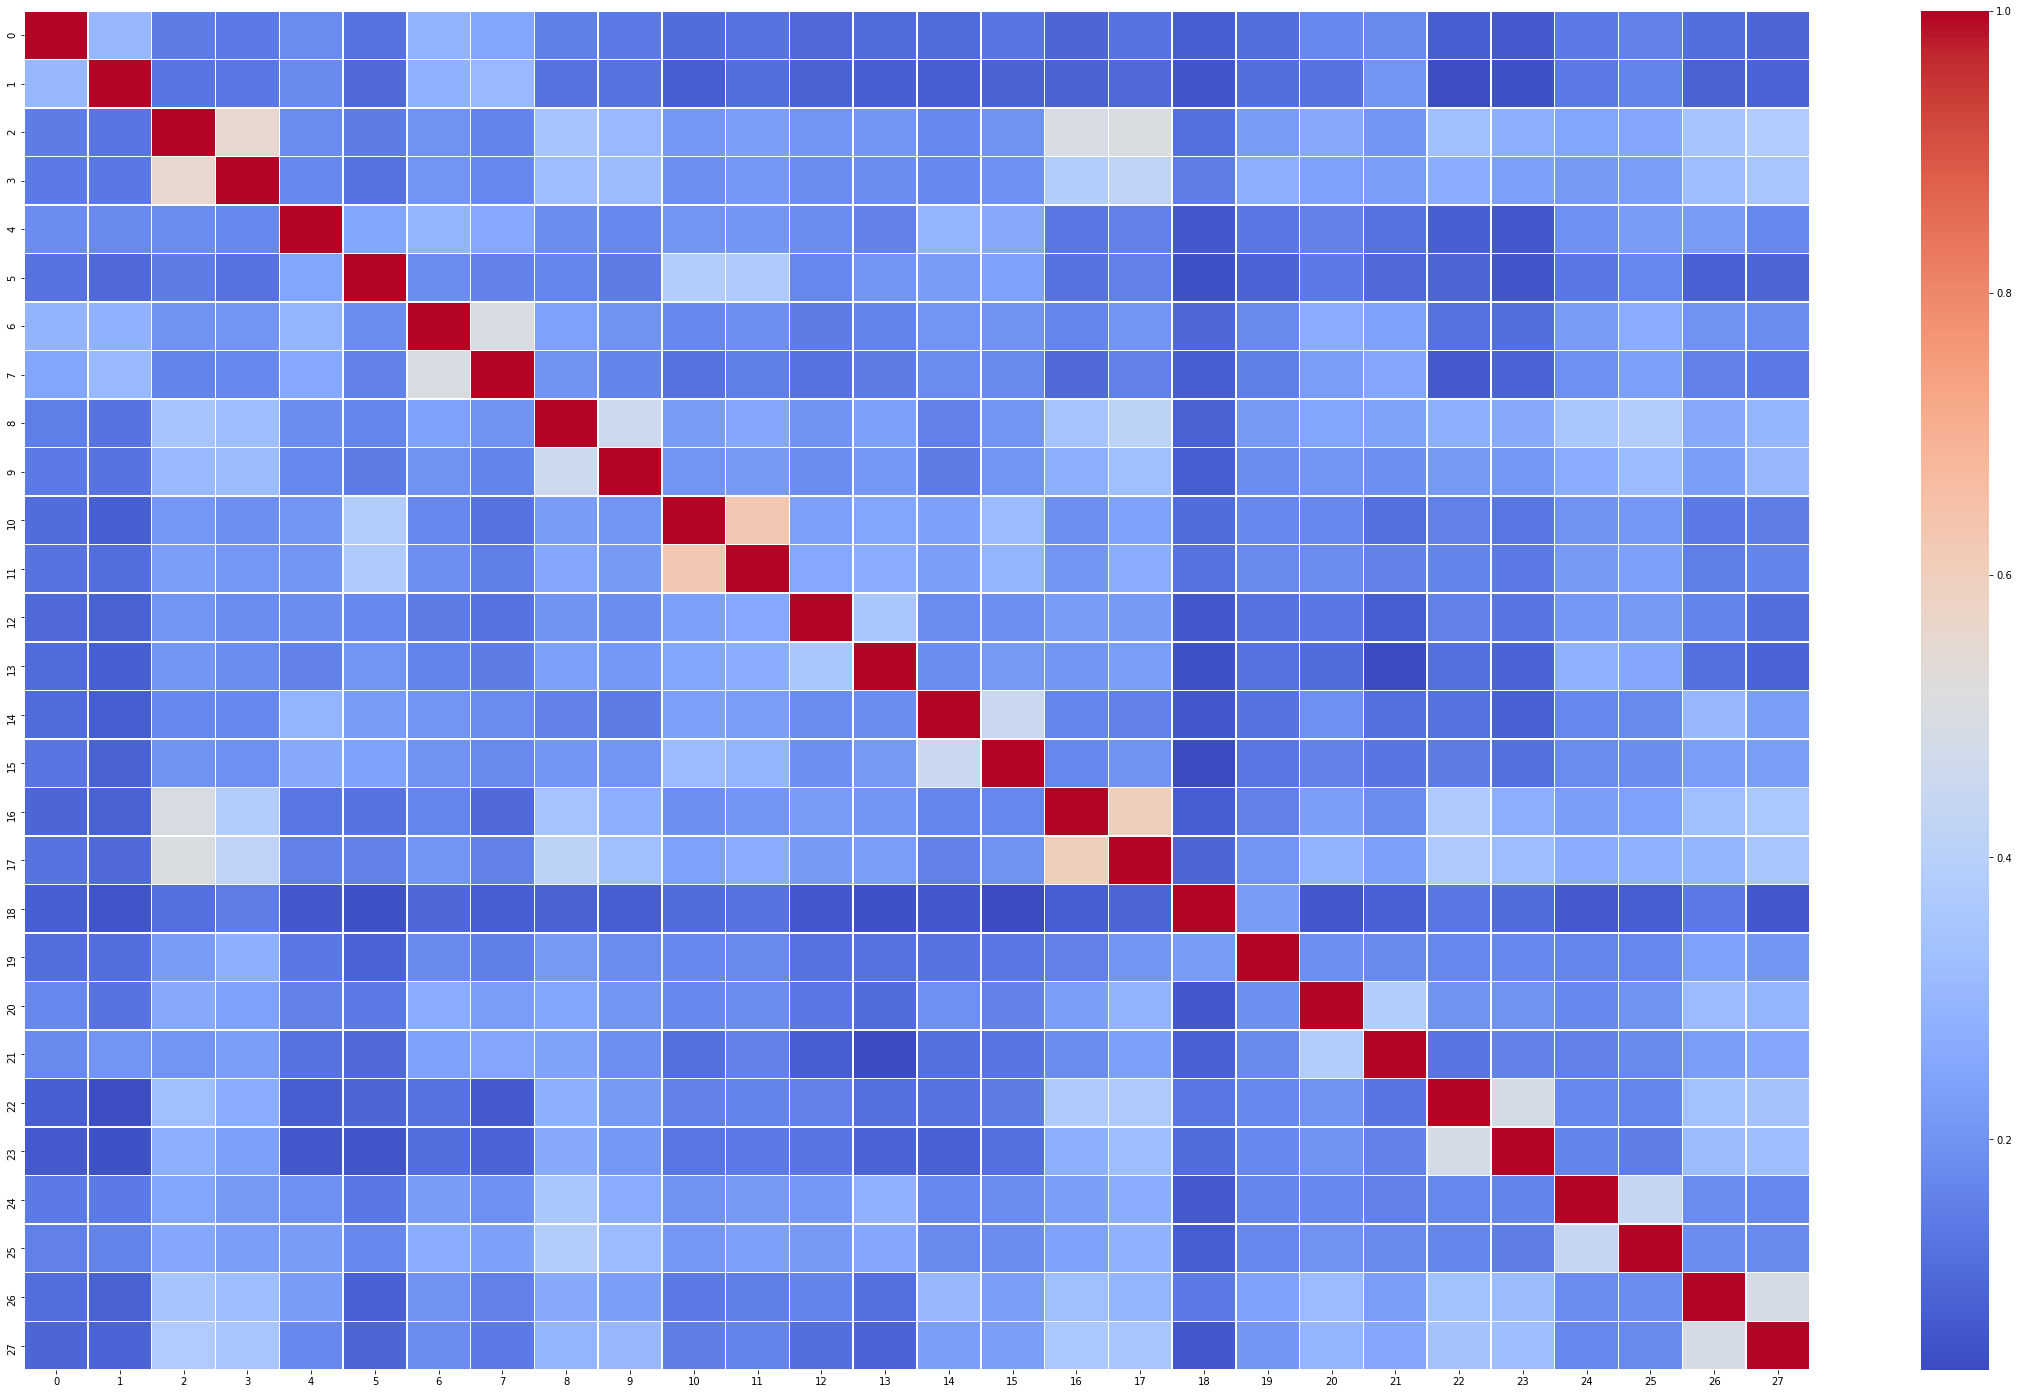

In [6]:
rwd_correlation_measure = ConnectivityMeasure(kind='correlation')

rwd_correlation_matrices = rwd_correlation_measure.fit_transform(reward_subjects)
# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(rwd_correlation_matrices.shape))
rwd_mean_correlation_matrix = rwd_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(rwd_mean_correlation_matrix.shape))


from nilearn import plotting
#plt.matshow(rwd_mean_correlation_matrix,cmap='hot')

import numpy as np
import seaborn as sns


plt.figure(figsize=(40,25))
ax = sns.heatmap(rwd_mean_correlation_matrix, linewidth=0.5, cmap='coolwarm')

#Save the figure
ax.figure.savefig("/Users/jennygilbert/Documents/betaseries_bevel/reward_coor_mat.png")

#plot_matrices(rwd_correlation_matrices[:5], 'reward')
#plot_matrices(rwd_mean_correlation_matrix, 'reward')



plt.show()
numpy.savetxt('/Users/jennygilbert/Documents/betaseries_bevel/reward_coor_mat.csv', rwd_mean_correlation_matrix, delimiter=',')


In [7]:
plotting.plot_connectome(rwd_mean_correlation_matrix, roi_coords,
                         title='Functional connectivity during reward',
                        output_file = '/Users/jennygilbert/Documents/betaseries_bevel/reward_connectome.png')

In [8]:
rwd_mean_correlation_matrix

array([[1.        , 0.3072034 , 0.14275584, 0.13963078, 0.18296732,
        0.12096359, 0.29052886, 0.24770661, 0.15294834, 0.13972055,
        0.10836558, 0.12529293, 0.10381945, 0.10576025, 0.10669976,
        0.1278141 , 0.09329241, 0.12673413, 0.08047506, 0.11554241,
        0.17563377, 0.17836648, 0.08019063, 0.06967157, 0.13966341,
        0.15664394, 0.11229631, 0.09538793],
       [0.3072034 , 1.        , 0.12887173, 0.13521347, 0.17896245,
        0.10249028, 0.28321679, 0.3093158 , 0.12334255, 0.12680251,
        0.08112036, 0.11188223, 0.08836913, 0.07992952, 0.07636725,
        0.08762315, 0.08757857, 0.10418732, 0.05900829, 0.11320008,
        0.12401502, 0.20522421, 0.0432785 , 0.05126031, 0.14126525,
        0.16425864, 0.08748829, 0.09178544],
       [0.14275584, 0.12887173, 1.        , 0.55918598, 0.17972855,
        0.1432374 , 0.20020419, 0.16313342, 0.34728663, 0.31096319,
        0.21181618, 0.22895   , 0.20219352, 0.20629318, 0.17364616,
        0.20048564, 0.4981

### Punishment Condition

Correlations of subjects are stacked in an array of shape (85, 28, 28)
Mean correlation has shape (28, 28).


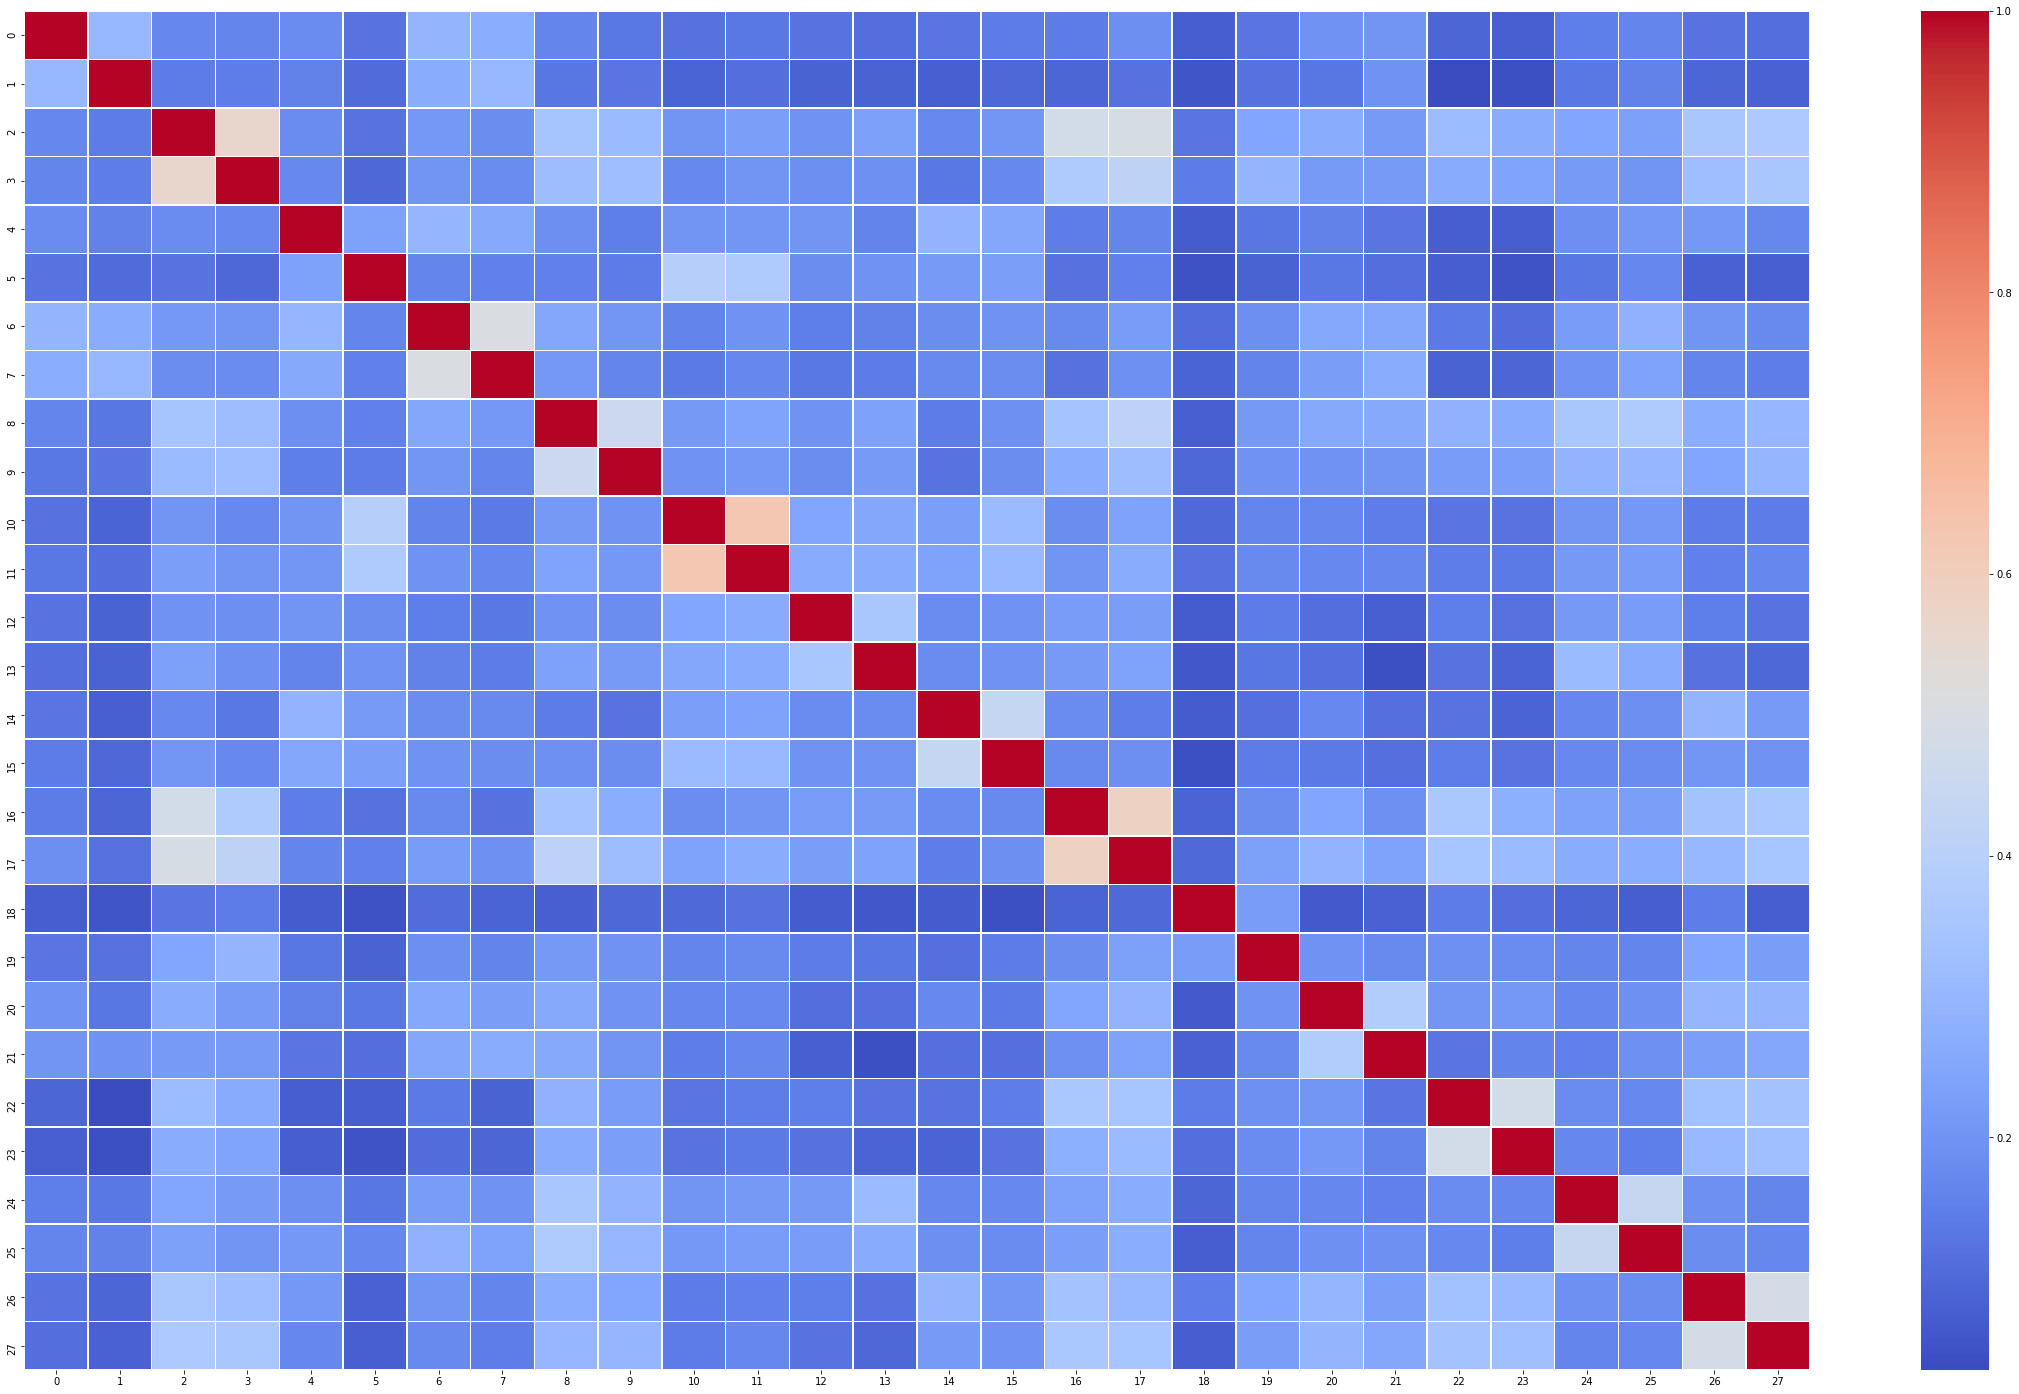

In [8]:
ph_correlation_measure = ConnectivityMeasure(kind='correlation')

ph_correlation_matrices = ph_correlation_measure.fit_transform(punish_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(ph_correlation_matrices.shape))
ph_mean_correlation_matrix = ph_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(ph_mean_correlation_matrix.shape))

plt.figure(figsize=(40,25))
ax = sns.heatmap(ph_mean_correlation_matrix, linewidth=0.5, cmap='coolwarm')

#Save the figure
ax.figure.savefig("/Users/jennygilbert/Documents/betaseries_bevel/punish_coor_mat.png")

plt.show()
#plot_matrices(ph_correlation_matrices[:5], 'punish')

numpy.savetxt('/Users/jennygilbert/Documents/betaseries_bevel/punish_coor_mat.csv', ph_mean_correlation_matrix, delimiter=',')

In [9]:
plotting.plot_connectome(ph_mean_correlation_matrix, roi_coords,
                         title='Functional connectivity during punishment',
                        output_file = '/Users/jennygilbert/Documents/betaseries_bevel/punish_connectome.png')

In [11]:
#Plot the differences in FC identified in R scripts
df=pd.read_csv('/Users/jennygilbert/Documents/betaseries_bevel/5_analysis/results/FC/comp_corr_plot.csv', sep=',',header=None)
df.values

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
#plot
plotting.plot_connectome(df, roi_coords,
                        output_file = '/Users/jennygilbert/Documents/betaseries_bevel/5_analysis/results/FC/difference_connectome.png')